In [1]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
real_mask_dir = "/work/vajira/DATA/sinGAN_polyps/singan_test_2/real_masks"

In [4]:
out_csvs_dir = "/work/vajira/DL/singan-polyp-aug-exp/new_csvs"

In [5]:
masks = os.listdir(real_mask_dir)

In [6]:
test_mask = os.path.join(real_mask_dir, masks[0])

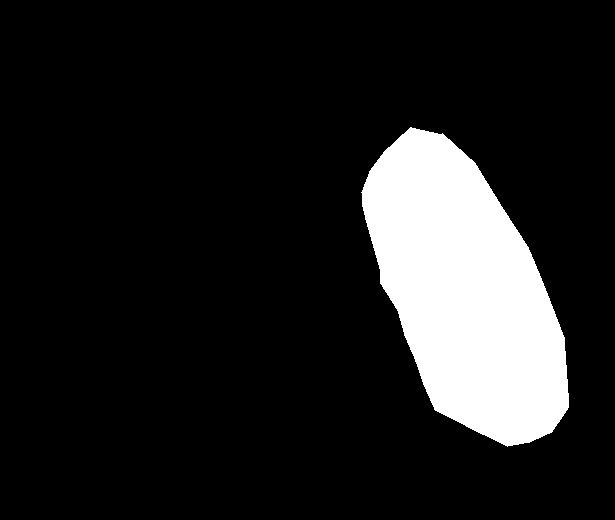

In [6]:
Image.open(test_mask)

In [7]:
img.shape

NameError: name 'img' is not defined

In [51]:
img = Image.open(test_mask)

In [52]:
img = np.array(img) > 127

In [53]:
np.array(img)[:,:,0].sum()

69107

In [54]:
np.array(img).shape[0] * np.array(img).shape[1]

321594

In [55]:
(np.array(img)[:,:,0].sum()/(np.array(img).shape[0] * np.array(img).shape[1]))*100

21.488895937113256

In [56]:
np.array(img)[:,:,2].sum()

69107

In [57]:
10576951*3

31730853

In [7]:
def analyse_mask(mask_dir):
    
    df = pd.DataFrame(columns=["mask_path", "height", "width", "resolution", "num_true_pixels", "true_pixel_per"])
    
    masks = os.listdir(mask_dir)
    
    for mask in masks:
        
        record = {}
        mask_path = os.path.join(mask_dir,mask)
        img = Image.open(mask_path)
        img = np.array(img)
        img = img > 127 # get only True and False values
        
        img = img[:,:,0] # get only one channel
        
        height = img.shape[0]
        width = img.shape[1]
        
        resolution= height * width
        
        true_pixels = img.sum()
        
        percentage = (true_pixels/resolution) * 100 
        
        record = {"mask_path": mask_path, "height": height, "width": width, "resolution": resolution, "num_true_pixels": true_pixels, "true_pixel_per": percentage}
        
        df = df.append(record, ignore_index=True)
        
    return df
        
        
        

In [8]:
df_all = analyse_mask(real_mask_dir)

In [10]:
df_all.head

<bound method NDFrame.head of                                              mask_path height width  \
0    /work/vajira/DATA/sinGAN_polyps/singan_test_2/...    520   615   
1    /work/vajira/DATA/sinGAN_polyps/singan_test_2/...    547   626   
2    /work/vajira/DATA/sinGAN_polyps/singan_test_2/...    505   577   
3    /work/vajira/DATA/sinGAN_polyps/singan_test_2/...    530   562   
4    /work/vajira/DATA/sinGAN_polyps/singan_test_2/...    528   622   
..                                                 ...    ...   ...   
995  /work/vajira/DATA/sinGAN_polyps/singan_test_2/...    546   626   
996  /work/vajira/DATA/sinGAN_polyps/singan_test_2/...    531   529   
997  /work/vajira/DATA/sinGAN_polyps/singan_test_2/...    528   621   
998  /work/vajira/DATA/sinGAN_polyps/singan_test_2/...    529   614   
999  /work/vajira/DATA/sinGAN_polyps/singan_test_2/...    528   595   

    resolution num_true_pixels  true_pixel_per  
0       319800           41478       12.969981  
1       342422     

In [72]:
def analyse_mask_from_csvs(csv_paths:list, amount_to_consider:int):
    
    df_mask_stat = pd.DataFrame(columns=["mask_path", "height", "width", "resolution", "num_true_pixels", "true_pixel_per"])
    
    df_csvs = pd.DataFrame(columns=["image_path", "mask_path"])
    
    for csv_path in csv_paths:
        df_temp = pd.read_csv(csv_path)
        df_csvs = df_csvs.append(df_temp, ignore_index=True)
        
    df_csvs = df_csvs[:amount_to_consider]
    print(len(df_csvs))
    
    for mask_path in list(df_csvs["mask_path"]):
        
        record = {}
        #mask_path = os.path.join(mask_dir,mask)
        img = Image.open(mask_path)
        img = np.array(img)
        img = img > 127 # get only True and False values
        
        img = img[:,:,0] # get only one channel
        
        height = img.shape[0]
        width = img.shape[1]
        
        resolution= height * width
        
        true_pixels = img.sum()
        
        percentage = (true_pixels/resolution) * 100 
        
        record = {"mask_path": mask_path, "height": height, "width": width, "resolution": resolution, "num_true_pixels": true_pixels, "true_pixel_per": percentage}
        
        df_mask_stat = df_mask_stat.append(record, ignore_index=True)
        
    return df_mask_stat

1000


<Figure size 2880x2880 with 0 Axes>

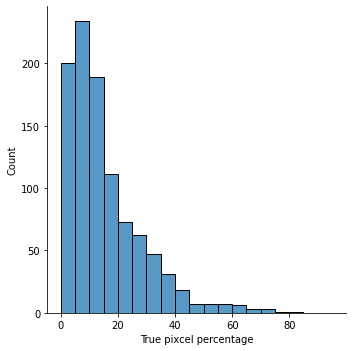

In [73]:
df = analyse_mask_from_csvs(["/work/vajira/DL/singan-polyp-aug-exp/notebooks/REAL_fold_0.csv","/work/vajira/DL/singan-polyp-aug-exp/notebooks/REAL_fold_1.csv", "/work/vajira/DL/singan-polyp-aug-exp/notebooks/REAL_fold_2.csv"], amount_to_consider=None)

plt.figure(figsize=(40,40))
sns_plt = sns.displot(df['true_pixel_per'],kde = False, bins=[i for i in range(0,100,5)])
sns_plt.set(xlabel='True pixcel percentage', ylabel='Count')
sns_plt.savefig("mask_pixel_distribution_all.pdf")

666


<Figure size 2880x2880 with 0 Axes>

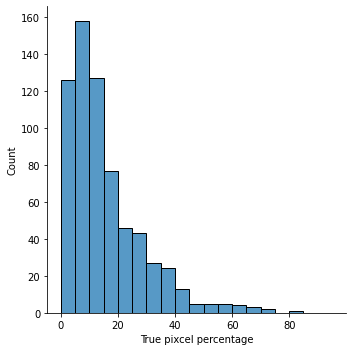

In [74]:
df = analyse_mask_from_csvs(["/work/vajira/DL/singan-polyp-aug-exp/notebooks/REAL_fold_1.csv", "/work/vajira/DL/singan-polyp-aug-exp/notebooks/REAL_fold_2.csv"], amount_to_consider=None)

plt.figure(figsize=(40,40))
sns_plt = sns.displot(df['true_pixel_per'],kde = False, bins=[i for i in range(0,100,5)])
sns_plt.set(xlabel='True pixcel percentage', ylabel='Count')
sns_plt.savefig("mask_pixel_distribution_fold_1_and_2.pdf")

334


<Figure size 2880x2880 with 0 Axes>

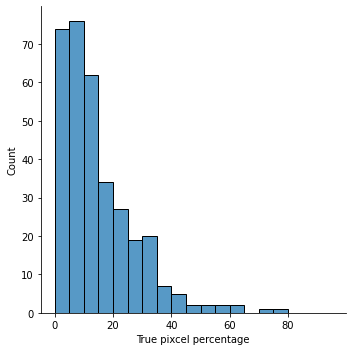

In [75]:
df = analyse_mask_from_csvs(["/work/vajira/DL/singan-polyp-aug-exp/notebooks/REAL_fold_0.csv"], amount_to_consider=None)

plt.figure(figsize=(40,40))
sns_plt = sns.displot(df['true_pixel_per'],kde = False, bins=[i for i in range(0,100,5)])
sns_plt.set(xlabel='True pixcel percentage', ylabel='Count')
sns_plt.savefig("mask_pixel_distribution_fold_0.pdf")

10


<Figure size 2880x2880 with 0 Axes>

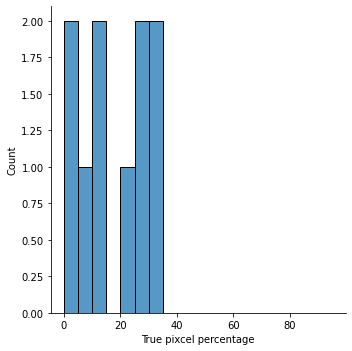

In [76]:
df = analyse_mask_from_csvs(["/work/vajira/DL/singan-polyp-aug-exp/notebooks/REAL_fold_0.csv"], amount_to_consider=10)

plt.figure(figsize=(40,40))
sns_plt = sns.displot(df['true_pixel_per'],kde = False, bins=[i for i in range(0,100,5)])
sns_plt.set(xlabel='True pixcel percentage', ylabel='Count')
sns_plt.savefig("mask_pixel_distribution_fold_0_10.pdf")

In [77]:
#list(df.mask_path)

100


<Figure size 2880x2880 with 0 Axes>

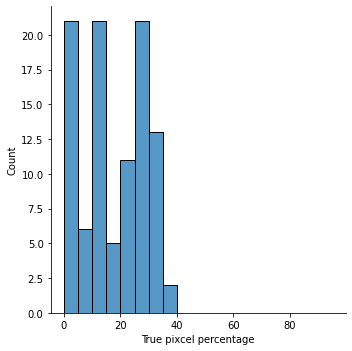

In [78]:
df = analyse_mask_from_csvs(["/work/vajira/DL/singan-polyp-aug-exp/notebooks/FAKE_scale_0_num_img_10_ST_1to1000_selected_50_fold_0.csv"], amount_to_consider=100)

plt.figure(figsize=(40,40))
sns_plt = sns.displot(df['true_pixel_per'],kde = False, bins=[i for i in range(0,100,5)])
sns_plt.set(xlabel='True pixcel percentage', ylabel='Count')
sns_plt.savefig("mask_pixel_distribution_FAKE_fold_0_100.pdf")

In [79]:
#list(df.mask_path)

20


<Figure size 2880x2880 with 0 Axes>

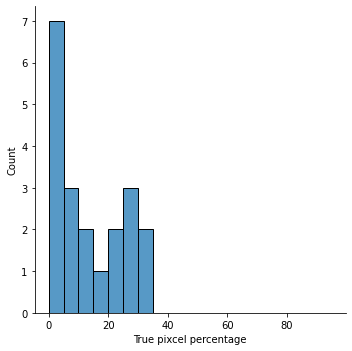

In [80]:
df = analyse_mask_from_csvs(["/work/vajira/DL/singan-polyp-aug-exp/notebooks/REAL_fold_0.csv"], amount_to_consider=20)

plt.figure(figsize=(40,40))
sns_plt = sns.displot(df['true_pixel_per'],kde = False, bins=[i for i in range(0,100,5)])
sns_plt.set(xlabel='True pixcel percentage', ylabel='Count')
sns_plt.savefig("mask_pixel_distribution_fold_0_20.pdf")

200


<Figure size 2880x2880 with 0 Axes>

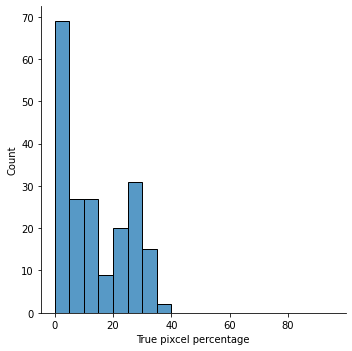

In [81]:
df = analyse_mask_from_csvs(["/work/vajira/DL/singan-polyp-aug-exp/notebooks/FAKE_scale_0_num_img_10_ST_1to1000_selected_50_fold_0.csv"], amount_to_consider=200)

plt.figure(figsize=(40,40))
sns_plt = sns.displot(df['true_pixel_per'],kde = False, bins=[i for i in range(0,100,5)])
sns_plt.set(xlabel='True pixcel percentage', ylabel='Count')
sns_plt.savefig("mask_pixel_distribution_FAKE_fold_0_200.pdf")

30


<Figure size 2880x2880 with 0 Axes>

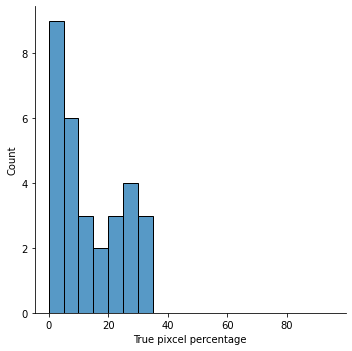

In [82]:
df = analyse_mask_from_csvs(["/work/vajira/DL/singan-polyp-aug-exp/notebooks/REAL_fold_0.csv"], amount_to_consider=30)

plt.figure(figsize=(40,40))
sns_plt = sns.displot(df['true_pixel_per'],kde = False, bins=[i for i in range(0,100,5)])
sns_plt.set(xlabel='True pixcel percentage', ylabel='Count')
sns_plt.savefig("mask_pixel_distribution_fold_0_30.pdf")

300


<Figure size 2880x2880 with 0 Axes>

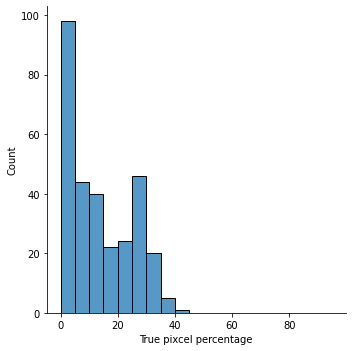

In [83]:
df = analyse_mask_from_csvs(["/work/vajira/DL/singan-polyp-aug-exp/notebooks/FAKE_scale_0_num_img_10_ST_1to1000_selected_50_fold_0.csv"], amount_to_consider=300)

plt.figure(figsize=(40,40))
sns_plt = sns.displot(df['true_pixel_per'],kde = False, bins=[i for i in range(0,100,5)])
sns_plt.set(xlabel='True pixcel percentage', ylabel='Count')
sns_plt.savefig("mask_pixel_distribution_FAKE_fold_0_300.pdf")

40


<Figure size 2880x2880 with 0 Axes>

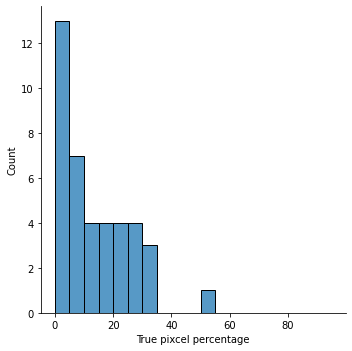

In [84]:
df = analyse_mask_from_csvs(["/work/vajira/DL/singan-polyp-aug-exp/notebooks/REAL_fold_0.csv"], amount_to_consider=40)

plt.figure(figsize=(40,40))
sns_plt = sns.displot(df['true_pixel_per'],kde = False, bins=[i for i in range(0,100,5)])
sns_plt.set(xlabel='True pixcel percentage', ylabel='Count')
sns_plt.savefig("mask_pixel_distribution_fold_0_40.pdf")

400


<Figure size 2880x2880 with 0 Axes>

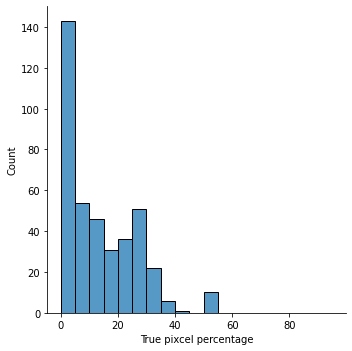

In [85]:
df = analyse_mask_from_csvs(["/work/vajira/DL/singan-polyp-aug-exp/notebooks/FAKE_scale_0_num_img_10_ST_1to1000_selected_50_fold_0.csv"], amount_to_consider=400)

plt.figure(figsize=(40,40))
sns_plt = sns.displot(df['true_pixel_per'],kde = False, bins=[i for i in range(0,100,5)])
sns_plt.set(xlabel='True pixcel percentage', ylabel='Count')
sns_plt.savefig("mask_pixel_distribution_FAKE_fold_0_400.pdf")

50


<Figure size 2880x2880 with 0 Axes>

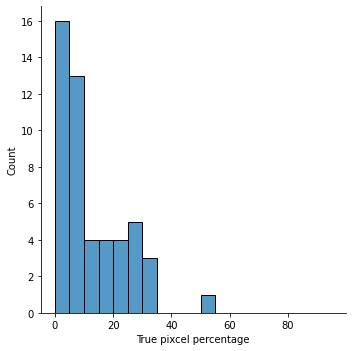

In [86]:
df = analyse_mask_from_csvs(["/work/vajira/DL/singan-polyp-aug-exp/notebooks/REAL_fold_0.csv"], amount_to_consider=50)

plt.figure(figsize=(40,40))
sns_plt = sns.displot(df['true_pixel_per'],kde = False, bins=[i for i in range(0,100,5)])
sns_plt.set(xlabel='True pixcel percentage', ylabel='Count')
sns_plt.savefig("mask_pixel_distribution_fold_0_50.pdf")

500


<Figure size 2880x2880 with 0 Axes>

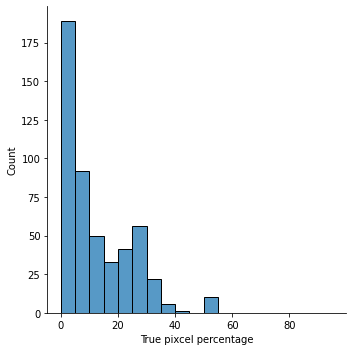

In [87]:
df = analyse_mask_from_csvs(["/work/vajira/DL/singan-polyp-aug-exp/notebooks/FAKE_scale_0_num_img_10_ST_1to1000_selected_50_fold_0.csv"], amount_to_consider=500)

plt.figure(figsize=(40,40))
sns_plt = sns.displot(df['true_pixel_per'],kde = False, bins=[i for i in range(0,100,5)])
sns_plt.set(xlabel='True pixcel percentage', ylabel='Count')
sns_plt.savefig("mask_pixel_distribution_FAKE_fold_0_500.pdf")

In [19]:
#df_all.index.values

In [16]:
#ax = sns.barplot(x="true_pixel_per",y="index"  data=df_all)

In [11]:
#[i for i in range(0,105,5)]

In [18]:
#import natsort

In [16]:
df_sorted = df_all.sort_values(by=["mask_path"])

In [ ]:
df_sorted.mask_apth =

In [17]:
list(df_sorted[:50]["mask_path"])

['/work/vajira/DATA/sinGAN_polyps/singan_test_2/real_masks/1.jpg',
 '/work/vajira/DATA/sinGAN_polyps/singan_test_2/real_masks/10.jpg',
 '/work/vajira/DATA/sinGAN_polyps/singan_test_2/real_masks/100.jpg',
 '/work/vajira/DATA/sinGAN_polyps/singan_test_2/real_masks/1000.jpg',
 '/work/vajira/DATA/sinGAN_polyps/singan_test_2/real_masks/101.jpg',
 '/work/vajira/DATA/sinGAN_polyps/singan_test_2/real_masks/102.jpg',
 '/work/vajira/DATA/sinGAN_polyps/singan_test_2/real_masks/103.jpg',
 '/work/vajira/DATA/sinGAN_polyps/singan_test_2/real_masks/104.jpg',
 '/work/vajira/DATA/sinGAN_polyps/singan_test_2/real_masks/105.jpg',
 '/work/vajira/DATA/sinGAN_polyps/singan_test_2/real_masks/106.jpg',
 '/work/vajira/DATA/sinGAN_polyps/singan_test_2/real_masks/107.jpg',
 '/work/vajira/DATA/sinGAN_polyps/singan_test_2/real_masks/108.jpg',
 '/work/vajira/DATA/sinGAN_polyps/singan_test_2/real_masks/109.jpg',
 '/work/vajira/DATA/sinGAN_polyps/singan_test_2/real_masks/11.jpg',
 '/work/vajira/DATA/sinGAN_polyps/sin

<Figure size 2880x2880 with 0 Axes>

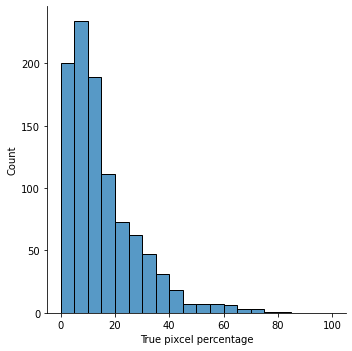

In [31]:
plt.figure(figsize=(40,40))
sns_plt = sns.displot(df_all['true_pixel_per'],kde = False, bins=[i for i in range(0,105,5)])
sns_plt.set(xlabel='True pixcel percentage', ylabel='Count')
sns_plt.savefig("mask_pixel_distribution.pdf")

In [48]:
df_0_5 = df_all[df_all["true_pixel_per"] < 5]
df_0_5.to_csv("../new_csvs/df_0_5.csv")

In [41]:
len(df_0_5)

200

In [42]:
df_5_10  = df_all[(df_all["true_pixel_per"] > 5) & (df_all["true_pixel_per"] <=10)]

In [43]:
len(df_5_10)

234

In [44]:
df_10_15  = df_all[(df_all["true_pixel_per"] > 10) & (df_all["true_pixel_per"] <=15)]

In [45]:
len(df_10_15)

189

In [46]:
df_15_20  = df_all[(df_all["true_pixel_per"] > 15) & (df_all["true_pixel_per"] <=20)]

In [47]:
len(df_15_20)

111